In [11]:
import pandas as pd 

data1 = pd.read_csv('H-S_seq_1.csv', header=0, parse_dates=['Date'])
data1.rename(columns = {'Date':'ds','S':'y'},inplace=True)
data1

,No.,ds,H,y
0,1,2021-08-06,0.000,0.000
1,2,2021-08-31,0.620,7.936
2,3,2021-09-03,0.620,8.184
3,4,2021-09-07,0.620,11.408
4,5,2021-09-10,0.620,11.904
...,...,...,...,...
57,58,2022-05-17,4.464,54.932
58,59,2022-05-20,4.464,54.932
59,60,2022-05-23,4.464,54.932
60,61,2022-05-27,4.464,54.932


In [12]:
from prophet import Prophet

m = Prophet(yearly_seasonality=False,weekly_seasonality=False,daily_seasonality=False)
m.add_regressor('H')
m.fit(data1)

future = m.make_future_dataframe(periods=10)
future['H'] = data1['H']
future.fillna(method='ffill',inplace=True)
future.tail(15)


10:44:01 - cmdstanpy - INFO - Chain [1] start processing
10:44:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,H
57,2022-05-17,4.464
58,2022-05-20,4.464
59,2022-05-23,4.464
60,2022-05-27,4.464
61,2022-05-30,4.464
62,2022-05-31,4.464
63,2022-06-01,4.464
64,2022-06-02,4.464
65,2022-06-03,4.464
66,2022-06-04,4.464


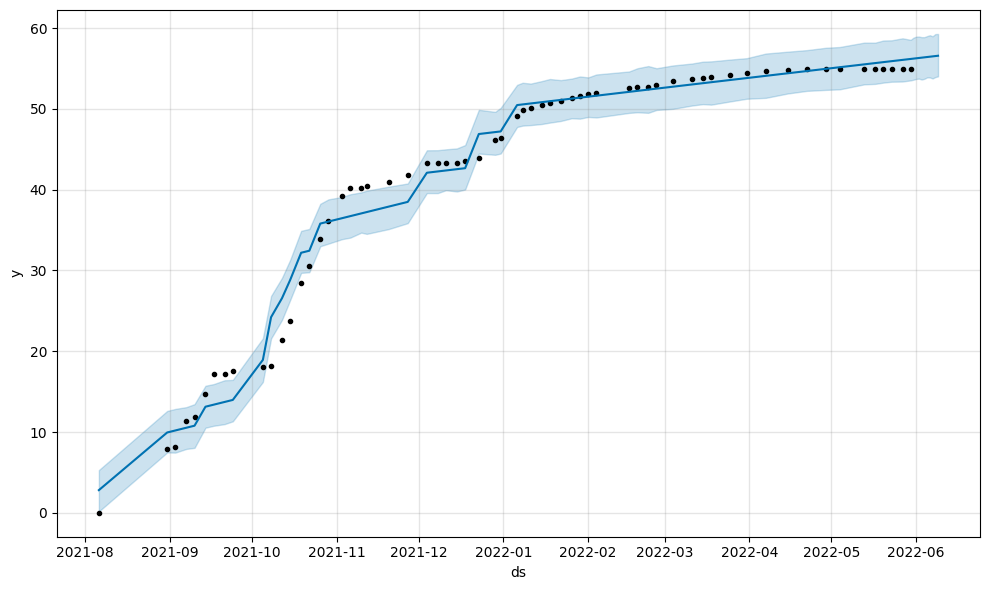

In [13]:
forecast = m.predict(future)
fig = m.plot(forecast)
# m.plot_components(forecast)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,H,H_lower,H_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-06,30.869916,0.166860,5.286764,30.869916,30.869916,-28.066300,-28.066300,-28.066300,-28.066300,-28.066300,-28.066300,-28.066300,-28.066300,-28.066300,0.0,0.0,0.0,2.803616
1,2021-08-31,32.969734,7.469145,12.606987,32.969734,32.969734,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,0.0,0.0,0.0,9.941391
2,2021-09-03,33.221712,7.450257,12.859969,33.221712,33.221712,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,0.0,0.0,0.0,10.193369
3,2021-09-07,33.557682,7.903531,13.080319,33.557682,33.557682,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,0.0,0.0,0.0,10.529340
4,2021-09-10,33.809661,8.039050,13.449920,33.809661,33.809661,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,-23.028342,0.0,0.0,0.0,10.781318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2022-06-05,48.219778,53.900924,59.018601,48.216160,48.222371,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,0.0,0.0,0.0,56.426774
68,2022-06-06,48.259263,53.895095,59.127295,48.254027,48.263411,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,0.0,0.0,0.0,56.466259
69,2022-06-07,48.298748,53.771289,58.995449,48.292011,48.304682,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,0.0,0.0,0.0,56.505744
70,2022-06-08,48.338233,53.940230,59.267039,48.329590,48.346217,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,8.206996,0.0,0.0,0.0,56.545228


In [15]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model




In [16]:
data2 = pd.read_csv('H-S_seq_2.csv', header=0, parse_dates=['Date'])
data2.rename(columns={'Date': 'ds', 'S': 'y'}, inplace=True)
data2


,No.,ds,H,y
0,1,2021-08-06,0.000,0.000
1,2,2021-08-31,0.620,5.456
2,3,2021-09-03,0.620,5.952
3,4,2021-09-07,0.620,7.812
4,5,2021-09-10,0.620,8.804
...,...,...,...,...
57,58,2022-05-17,4.092,52.948
58,59,2022-05-20,4.092,52.948
59,60,2022-05-23,4.092,52.948
60,61,2022-05-27,4.092,52.948


In [26]:
m.fit

Exception: Prophet object can only be fit once. Instantiate a new object.